<a href="https://colab.research.google.com/github/vunky-himawan/PCVK/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Membuat fungsi konvolusi

In [ ]:
def convolution2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    output = np.zeros((output_height, output_width))

    for x in range(output_width):
        for y in range(output_height):
            z = 0
            for k1 in range(kernel_width):
                for k2 in range(kernel_height):
                    z += kernel[k1, k2] * image[y + k2, x + k1]
            output[y, x] = z

    output = np.clip(output, 0, 255)
    return output.astype(np.uint8)

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

In [ ]:
sharpen_image = convolution2d(img_gray, kernel_sharpen)

Text(0.5, 1.0, 'Sharpen')

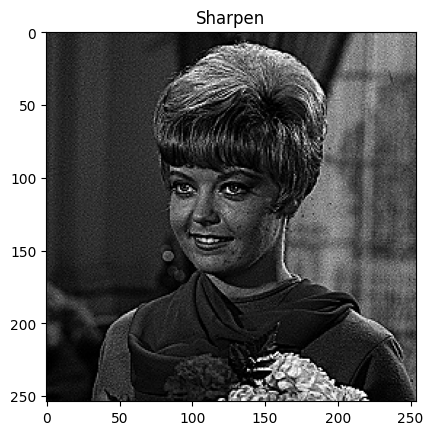

In [ ]:
plt.imshow(cv.cvtColor(sharpen_image, cv.COLOR_GRAY2RGB))
plt.title('Sharpen')

In [ ]:
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

In [ ]:
emboss_image = convolution2d(img_gray, kernel_emboss)

Text(0.5, 1.0, 'Emboss')

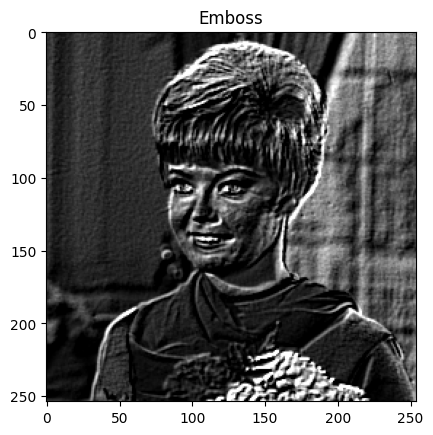

In [ ]:
plt.imshow(cv.cvtColor(emboss_image, cv.COLOR_GRAY2RGB))
plt.title('Emboss')

In [ ]:
kernel_left_sobel = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

In [ ]:
left_sobel_image = convolution2d(img_gray, kernel_left_sobel)

Text(0.5, 1.0, 'Left Sobel')

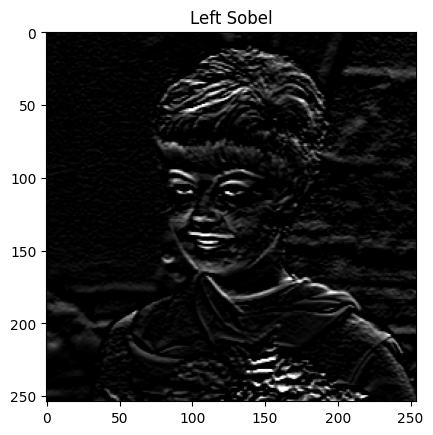

In [ ]:
plt.imshow(cv.cvtColor(left_sobel_image, cv.COLOR_GRAY2RGB))
plt.title('Left Sobel')

In [ ]:
kernel_canny = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

In [ ]:
canny_image = convolution2d(img_gray, kernel_canny)

Text(0.5, 1.0, 'Canny')

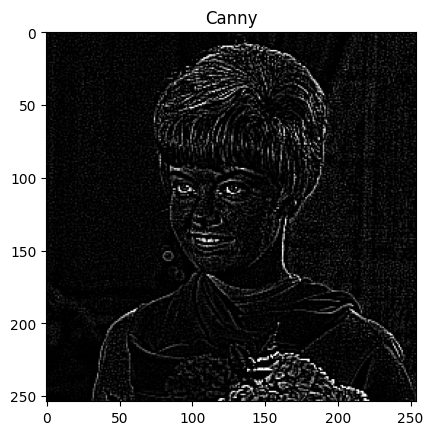

In [ ]:
plt.imshow(cv.cvtColor(canny_image, cv.COLOR_GRAY2RGB))
plt.title('Canny')

In [ ]:
kernel_prewitt = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])

In [ ]:
prewitt_image = convolution2d(img_gray, kernel_prewitt)

Text(0.5, 1.0, 'Prewitt')

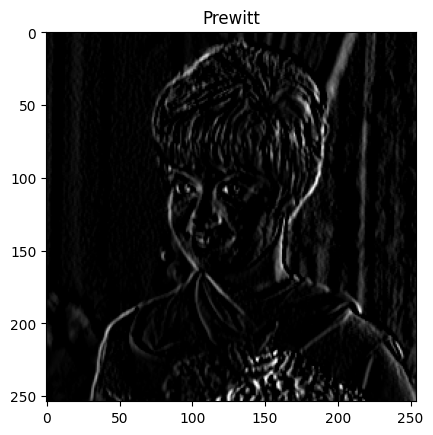

In [ ]:
plt.imshow(cv.cvtColor(prewitt_image, cv.COLOR_GRAY2RGB))
plt.title('Prewitt')

In [ ]:
kernel_gaussian = np.array([[1, 4, 6, 4, 1],
                           [4, 16, 24, 16, 4],
                           [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4, 6, 4, 1]])

In [ ]:
gaussian_image = convolution2d(img_gray, ((1/256) * kernel_gaussian))

Text(0.5, 1.0, '5x5 Gaussian Blur')

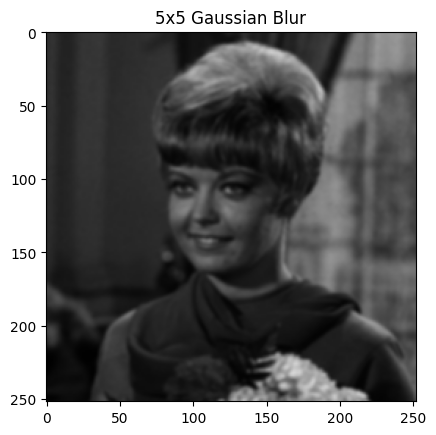

In [ ]:
plt.imshow(cv.cvtColor(gaussian_image, cv.COLOR_GRAY2RGB))
plt.title('5x5 Gaussian Blur')

In [ ]:
kernel_size = 21;

In [ ]:
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)

gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

In [ ]:
gaussian_image = convolution2d(img_gray, gauss_kernel)

Text(0.5, 1.0, '21x21 Gaussian Blur')

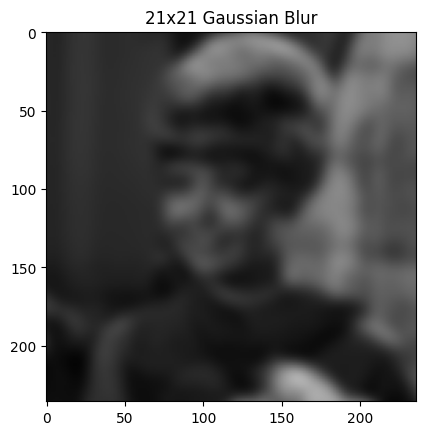

In [ ]:
plt.imshow(cv.cvtColor(gaussian_image, cv.COLOR_GRAY2RGB))
plt.title('21x21 Gaussian Blur')